## Rapid Research Report: Phase 3

##### Forest fire prediction and research involve analyzing various factors that contribute to the occurrence and spread of wildfires. 
Below is a description of the datset uses in this project:


Dataset
X: X-axis spatial coordinate within the Montesinho park map: 1 to 9
Y: Y-axis spatial coordinate within the Montesinho park map: 2 to 9
month: Month of the year: 'jan' to 'dec'
day: Day of the week: 'mon' to 'sun'
FFMC: Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
DMC: Duff Moisture Code index from the FWI system: 1.1 to 291.3
DC: Drought Code index from the FWI system: 7.9 to 860.6
ISI: Initial Spread Index from the FWI system: 0.0 to 56.10
temp: Temperature in Celsius degrees: 2.2 to 33.30
RH: Relative humidity in percentage: 15
wind: Wind speed in km/h: 0.40 to 9.40
rain: Outside rain in mm/m2 : 0.0 to 6.4
area: The burned area of the forest (in ha): 0.00 to 1090.
84.0 to 100

In [67]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the dataset 
df = pd.read_csv('forestfires.csv')

In [342]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [121]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


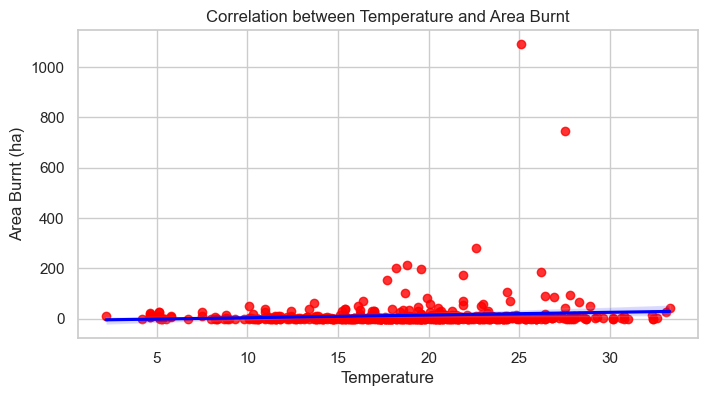

In [331]:
# Scatter plot with regression line
plt.figure(figsize=(8, 4))
sns.regplot(x='temp', y='area', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.xlabel('Temperature')
plt.ylabel('Area Burnt (ha)')
plt.title('Correlation between Temperature and Area Burnt')
plt.show()

**The scatter plot shows that higher temperatures are associated with larger areas burnt and since the points closely follow the regression line, it suggests a strong linear relationship.**

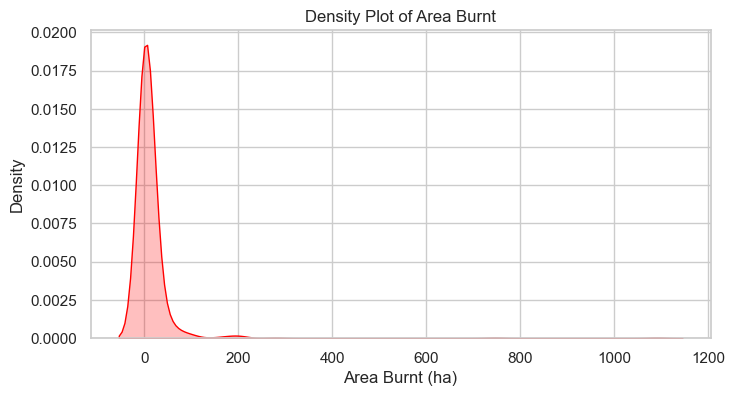

In [323]:
# Plot the density of area burnt
plt.figure(figsize=(8, 4))
sns.kdeplot(df['area'], fill=True, color='red')
plt.xlabel('Area Burnt (ha)')
plt.ylabel('Density')
plt.title('Density Plot of Area Burnt')
plt.show()

**The distribution data for Burnt Area is rightly skewed.**

In [362]:
# Coverting the days and months into the integers
df.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
df.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

#### Which months do forest fires happen the most?
---
#### Which days of the week do forest fires happen the most?

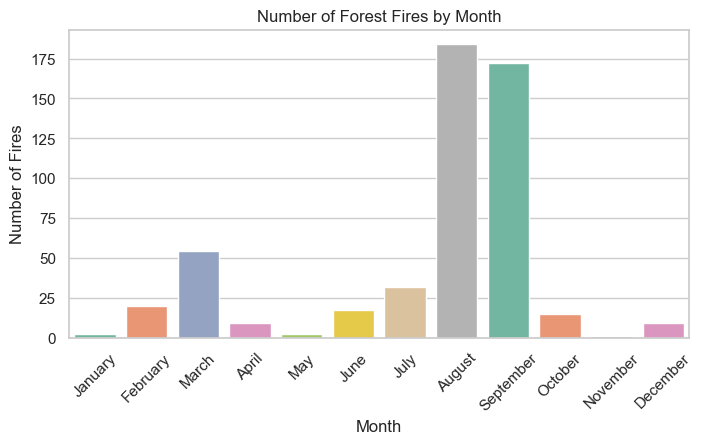

In [364]:
# Map month numbers to month names
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 
             6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 
             11: 'November', 12: 'December'}
df['month_name'] = df['month'].map(month_map)

# Count the number of fires by month
fires_by_month = df['month_name'].value_counts().reindex(month_map.values(), fill_value=0)

# Create the bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=fires_by_month.index, y=fires_by_month.values, palette="Set2")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.title('Number of Forest Fires by Month')

plt.xticks(rotation=45)
plt.show()

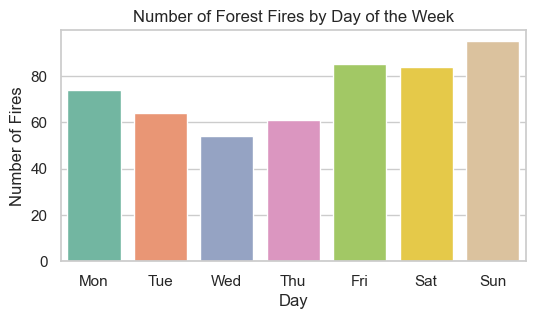

In [390]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of days
day_order = [1, 2, 3, 4, 5, 6, 7]
# Convert 'day' column to categorical type with the specified order
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)

sns.set(style="whitegrid")

# Plot the number of forest fires by day
plt.figure(figsize=(6,3))
sns.countplot(x='day', data=df, palette='Set2', order=day_order)
plt.title('Number of Forest Fires by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Fires')

plt.xticks(ticks=range(len(day_order)), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

**The graphs show that August and September have more forest fires than other months. It also looks as though the weekends (Friday, Saturday, and Sunday) have more forest fires than days in the middle of the week.**




In [15]:
#Identify missing values
missing_values = df.isnull().sum()
print(missing_values)


X                  0
Y                  0
month              0
day                0
FFMC               0
DMC                0
DC                 0
ISI                0
temp               0
RH                 0
wind               0
rain               0
area               0
fire_category    247
dtype: int64


In [133]:
df.dtypes

X          int64
Y          int64
month      int64
day        int64
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

If fire area > 0, set the value to 1 and change column name from area to label so that we can see it as a classification problem

In [7]:
df['area'].values[df['area'].values > 0] = 1
df = df.rename(columns={'area': 'label'})
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,1.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,1.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,1.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.0


### Data Preprocessing

In [139]:
X = df.drop(['label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---

### Lets Train and Evaluate Classifiers

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Encoding categorical variables
label_encoder = LabelEncoder()
df['month'] = label_encoder.fit_transform(df['month'])
df['day'] = label_encoder.fit_transform(df['day'])

In [11]:
# Define features and target
X = df.drop(columns=['label'])
y = df['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [81]:
# Fitting the model
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score (Training Accuracy):", best_score)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score (Training Accuracy): 0.5318493150684931


### Evaluating the Model

In [83]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.6153846153846154
Classification Report:
               precision    recall  f1-score   support

         0.0       0.63      0.55      0.58        77
         1.0       0.61      0.68      0.64        79

    accuracy                           0.62       156
   macro avg       0.62      0.61      0.61       156
weighted avg       0.62      0.62      0.61       156

Confusion Matrix:
 [[42 35]
 [25 54]]


#### Random Forest Classifier

In [89]:
# Use the same preprocessing as above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5641025641025641
Classification Report:
               precision    recall  f1-score   support

         0.0       0.57      0.45      0.51        77
         1.0       0.56      0.67      0.61        79

    accuracy                           0.56       156
   macro avg       0.57      0.56      0.56       156
weighted avg       0.57      0.56      0.56       156



#### KNN Classifier

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# KNN model with k = 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.5705128205128205
Confusion Matrix:
 [[47 30]
 [37 42]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.61      0.58        77
         1.0       0.58      0.53      0.56        79

    accuracy                           0.57       156
   macro avg       0.57      0.57      0.57       156
weighted avg       0.57      0.57      0.57       156



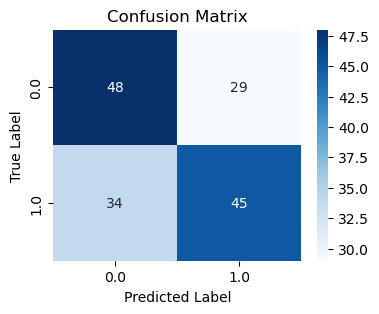

In [93]:
# Define the confusion matrix
conf_matrix = np.array([[48, 29],
                        [34, 45]])

# Define class labels
labels = ['0.0', '1.0']

# Create a heatmap plot of the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### XGboost Classifier

In [57]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.5192307692307693
Confusion Matrix:
 [[36 41]
 [34 45]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.47      0.49        77
         1.0       0.52      0.57      0.55        79

    accuracy                           0.52       156
   macro avg       0.52      0.52      0.52       156
weighted avg       0.52      0.52      0.52       156



In [59]:
# Hyperparameter Tuning on the base model
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.576103500761035


In [97]:
# Use the best model to predict on the test data
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy_best}")
print("Best Model Confusion Matrix:\n", conf_matrix_best)
print("Best Model Classification Report:\n", class_report_best)

Best Model Accuracy: 0.5833333333333334
Best Model Confusion Matrix:
 [[36 41]
 [24 55]]
Best Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.47      0.53        77
         1.0       0.57      0.70      0.63        79

    accuracy                           0.58       156
   macro avg       0.59      0.58      0.58       156
weighted avg       0.59      0.58      0.58       156



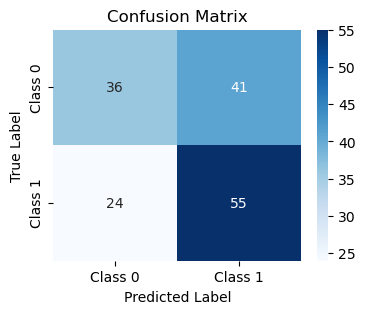

In [87]:
# Define the confusion matrix
conf_matrix = np.array([[36, 41],
                        [24, 55]])

# Plotting
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])

# Add labels, title and adjust layout
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Summary

I am working on conceptualizing some of these models to generate a summary of results based on their interpretation. At present, I am familiar with Decision Trees and K-Nearest Neighbors (KNN) models, but I am still working on XGboost, SVM & Random Forest to deepen my understanding of these models.